# __Plots and calculations for Callibration of the  Lock in Amplifier__

In [14]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

An inverting amplifier is also used in order to amplify weak signals for the phase sensitive detection. The values of the resistances and other components used are:
- $R_f = 100k\Omega$
- $R_1 = 1k\Omega$
- $\pm V_{cc} = 6V$

The Amplification factor is calculated by the formula:
\begin{equation}
    \alpha = \frac{V_{out}}{V_{in}} = - \frac{R_f}{R_{in}}
\end{equation}

from the plot of $V_{out}$ vs $V_{in}$, we get the $\alpha$. For the callibration, the input of the opamp is obtained from the WG port of the SEELab which generates a Voltage of $3\sin{(2\pi f t)}$. it is then passed through a voltage divider circuit through a potentimeter of 2k resistance. The optput is then connected to the inverting amplifier.
The circuit Diagram for the Inverting Amplifier is shown below:


***<p style="text-align: center;">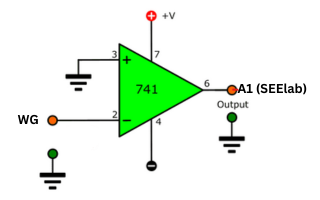</p>***

### Loading the txt files

In [11]:
data_500 = np.loadtxt('CAL_500.txt')
data_1000 = np.loadtxt('CAL_1000.txt')
data_2000 = np.loadtxt('CAL_2000.txt')

### Plotting the data

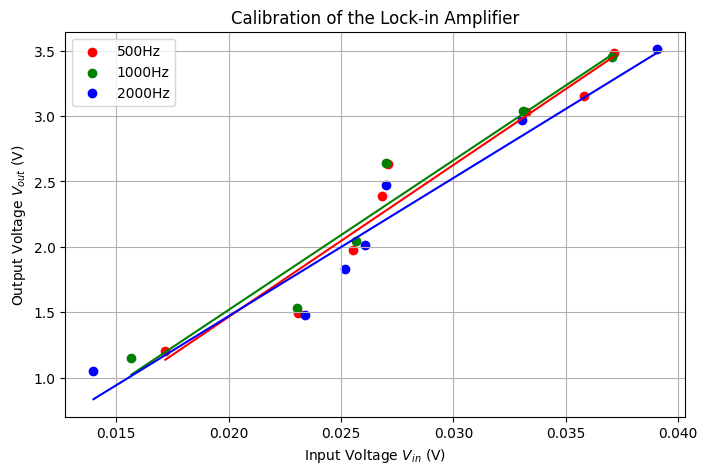

500Hz - Slope: 116.2500 +/- 12.3086, Intercept: -0.8614 +/- 0.3562
1000Hz - Slope: 114.4792 +/- 14.7843, Intercept: -0.7725 +/- 0.4108
2000Hz - Slope: 105.7034 +/- 12.7032, Intercept: -0.6446 +/- 0.3530


In [15]:
slope_500, intercept_500, r_value_500, _, stderr_500 = linregress(data_500[:,0], data_500[:,1])
slope_1000, intercept_1000, r_value_1000, _, stderr_1000 = linregress(data_1000[:,0], data_1000[:,1])
slope_2000, intercept_2000, r_value_2000, _, stderr_2000 = linregress(data_2000[:,0], data_2000[:,1])


plt.figure(figsize=(8,5))
plt.scatter(data_500[:,0], data_500[:,1], color='r', label='500Hz')
plt.scatter(data_1000[:,0], data_1000[:,1], color='g', label='1000Hz')
plt.scatter(data_2000[:,0], data_2000[:,1], color='b', label='2000Hz')


plt.plot(data_500[:,0], slope_500 * data_500[:,0] + intercept_500, color='r')
plt.plot(data_1000[:,0], slope_1000 * data_1000[:,0] + intercept_1000, color='g')
plt.plot(data_2000[:,0], slope_2000 * data_2000[:,0] + intercept_2000, color='b')

plt.title('Calibration of the Lock-in Amplifier')
plt.xlabel(r'Input Voltage $V_{in}$ (V)')
plt.ylabel(r'Output Voltage $V_{out}$ (V)')
plt.grid()
plt.legend()
plt.show()


print("500Hz - Slope: {:.4f} +/- {:.4f}, Intercept: {:.4f} +/- {:.4f}".format(slope_500, stderr_500, intercept_500, stderr_500 * np.sqrt(np.mean(data_500[:,0]**2))))
print("1000Hz - Slope: {:.4f} +/- {:.4f}, Intercept: {:.4f} +/- {:.4f}".format(slope_1000, stderr_1000, intercept_1000, stderr_1000 * np.sqrt(np.mean(data_1000[:,0]**2))))
print("2000Hz - Slope: {:.4f} +/- {:.4f}, Intercept: {:.4f} +/- {:.4f}".format(slope_2000, stderr_2000, intercept_2000, stderr_2000 * np.sqrt(np.mean(data_2000[:,0]**2))))
